![title](Twitter.jpg)

In [1]:
# Installation Missingno (missing values library), TensorFlow and Spacy
!pip install missingno -q
!pip install -U spacy -q
!python -m spacy download en_core_web_sm -q
!pip install tensorflow -q
!pip install wordcloud -q
!pip install plotly -q

2021-10-26 05:03:37.996546: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-26 05:03:37.996613: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# SUMMARY

### 1. Download datas & EDA
### 2. NLP Preprocessing 
### 3. Machine Learning => Deep Learning
### 4. Conclusion

In [2]:
# Import librairies TensorFlow & Pathlib 
import tensorflow as tf 
import pathlib 
import pandas as pd 
import numpy as np
import seaborn as sns
import spacy
import missingno as msno
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from plotly import graph_objects as go
from tensorflow.keras.layers import ReLU, LeakyReLU, ELU 
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.metrics import BinaryAccuracy
from keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from plotly import express as px
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv1D, Conv2D, Conv3D
from tensorflow.keras.layers import MaxPool2D, AveragePooling2D
from IPython.display import Image
from IPython import display
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib.cm as cm
import glob 
import os 
import time 
from spacy.lang.en.stop_words import STOP_WORDS
import warnings
warnings.filterwarnings('ignore')
nlp = spacy.load("en_core_web_sm")
tf.__version__

'2.6.0'

# 1. Data & EDA

#### Natural Language Processing (NLP) : is a technology that enables machines to understand human language. Today it is one of the main drivers of artificial intelligence

#### Project objectives : 
We want to analyze a batch of tweets that could let us know if this is a natural disaster or not, especially through words that would suggest (or look like) a disaster.

In [3]:
train = pd.read_csv('train.csv', encoding = 'utf8')
train = train.sample(len(train))
print(train.shape)
print(train.size)
train.sample(5)

(7613, 5)
38065


,id,keyword,location,text,target
1152,1660,bombing,"Washington, DC",#Japan marks 70th anniversary of #Hiroshima at...,1
7026,10071,typhoon,NaN,abcnews - Obama Declares Disaster for Typhoon-...,1
4022,5713,forest%20fire,Shelby County,I added a video to a @YouTube playlist http://...,1
4953,7059,meltdown,NaN,Whenever I have a meltdown and need someone @B...,0
6108,8721,sinking,Liverpool,Do you feel like you are sinking in low self-i...,1


In [4]:
train.head()

,id,keyword,location,text,target
5093,7265,nuclear%20disaster,NaN,3 former executives to be prosecuted in Fukush...,1
4610,6553,injury,NaN,DAL News: Wednesday's injury report: RB Lance ...,0
166,241,airplane%20accident,Fashion Heaven. IG: TMId_,My phone looks like it was in a car ship airpl...,0
1139,1643,bombing,NaN,#Setting4Success Bells toll in Hiroshima as Ja...,1
6000,8571,screams,Where ever i please,@saku_uchiha_ @Ya_Boi_Luke \n\nScreams and get...,0


In [5]:
print(train['target'].unique())
print(train.info())
print(train.nunique())


[1 0]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 5093 to 4461
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 356.9+ KB
None
id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64


## Top Keywords

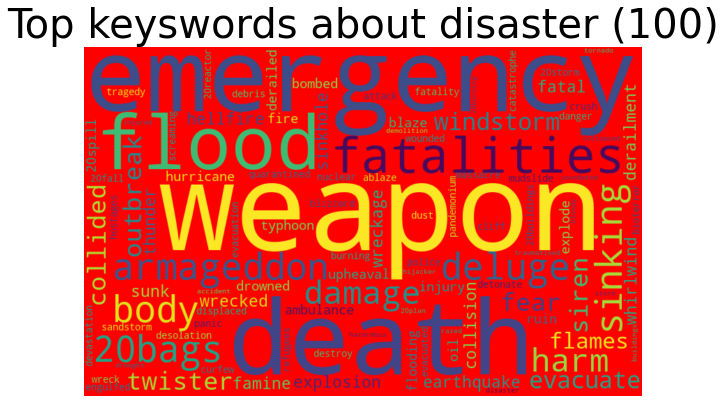

In [6]:
#Show the frequency of column "keyword"
regular_kw = train.keyword.value_counts()

#Generate the TOP 100 relevant words
top_kw = regular_kw.head(100)
top_kw = top_kw.index

#Wordcloud settings
#mask = np.array(Image.open("comment_wc.png"))
words = ' '.join(''.join(text) for text in top_kw)                            
wcd = WordCloud(background_color="red",
                        width=800, 
                            height=500, 
                                stopwords=STOP_WORDS, 
                                    #mask=mask
                                       ).generate(words)


#Wordcloud graph
plt.figure(figsize=(10, 7)) 
plt.imshow(wcd, interpolation="bilinear")
plt.title("Top keyswords about disaster (100)", fontsize=40)
plt.axis('off')
plt.show()

## Some vizualisations

Text(0.5, 0, '42.97 % of those tweets concern a disaster in our data')

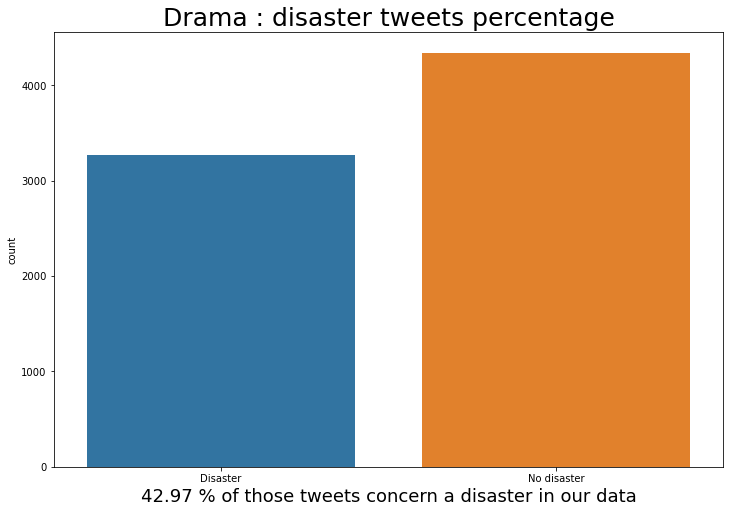

In [7]:
train['drama'] = train['target'].apply(lambda x: "Disaster" if x == 1 else "No disaster") 

# We want to make a vizualisation of the dataset and seeing how the tweets 
# are splited 
plt.figure(figsize = (12, 8))

ax = sns.countplot(train['drama'])
ax.set_title('Drama : disaster tweets percentage', fontsize = 25)
#ax.set(xlabel=f'{train.target[train.target==1].count()/train.target.count()*100:.2f} % of those tweets concern a disaster in our data')
plt.xlabel(f'{train.target[train.target==1].count()/train.target.count()*100:.2f} % of those tweets concern a disaster in our data', fontsize=18)
#f'{train.target[train.target==1].count()/train.target.count()*100:.2f} % of those tweets concern a disaster in our data'

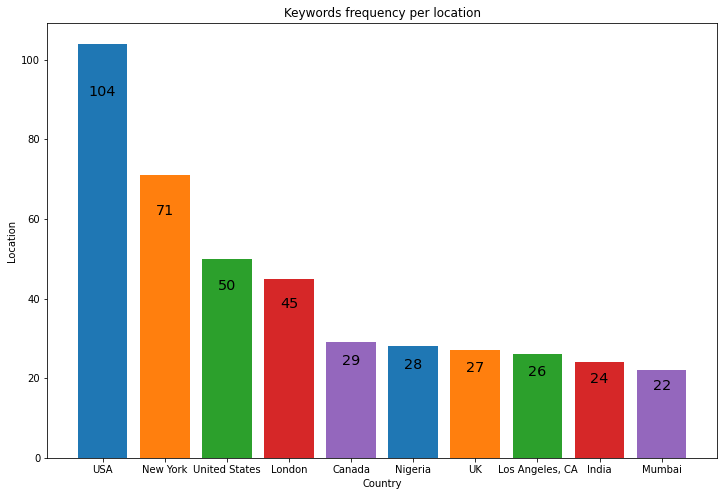

In [8]:
#Show the frequency of column "location"
top_cities = train.location.value_counts().head(10)
top_cities.index
top_cities.values

#Show the bar chart
plt.figure(figsize = (12, 8))
for i in range(len(top_cities.index)):
    plt.text(top_cities.index[i],top_cities[i]*0.9, np.round(top_cities[i],2), ha = "center", va = "top", size='x-large')

plt.bar(top_cities.index, top_cities.values, color=['tab:blue', 'tab:orange','tab:green','tab:red','tab:purple']
       )
plt.title("Keywords frequency per location")
plt.xlabel("Country")
plt.ylabel("Location")
plt.show()

In [9]:

#Set the TOP 10 countries in term of events
train['Top_country'] = train['location'].apply(lambda x: 'USA' if x == 'New York' 
                                                    else 'USA' if x == 'United States' 
                                                        else 'UK' if x == 'London'
                                                            else 'USA' if x == 'Los Angeles, CA'
                                                             else 'India' if x == 'Mumbai'
                                             else 'USA' if x == 'Washington, DC'
                                                 else 'USA' if x == 'Chicago, IL'
                                                     else 'USA' if x == 'New York, NY'
                                                         else 'USA' if x == 'California, USA'
                                                             else 'USA' if x == 'San Francisco'
                                             else 'USA' if x == 'Florida'
                                                 else 'UK' if x == 'United Kingdom'
                                                     else 'USA' if x == 'California'
                                                          else 'USA' if x == 'Los Angeles'
                                                              else 'USA' if x == 'Washington, D.C.'        
                                                                else  x 

                                                   )

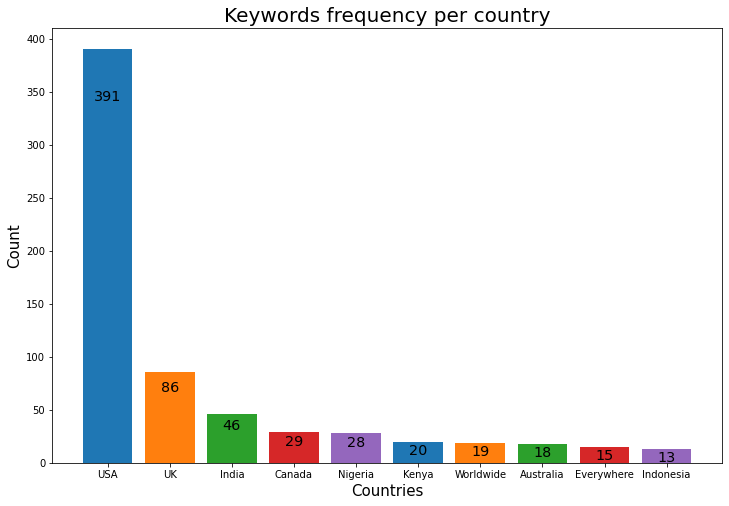

In [10]:
#Show the frequency of column "location"
top_countries = train.Top_country.value_counts().head(10)
top_countries.index
top_countries.values

#Show the bar chart
plt.figure(figsize = (12, 8))
for i in range(len(top_countries.index)):
    plt.text(top_countries.index[i],top_countries[i]*0.9, np.round(top_countries[i],2), ha = "center", va = "top", size='x-large')

plt.bar(top_countries.index, top_countries.values, color=['tab:blue', 'tab:orange','tab:green','tab:red','tab:purple']
       )
plt.title("Keywords frequency per country", fontsize = 20)
plt.xlabel("Countries", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

# 2. NLP Preprocessing¶

In [11]:
# First, we'll work on the train dataset to visualize tweets, and then clean them

count_vectorizer = feature_extraction.text.CountVectorizer()

# let's get counts for the first 5 tweets in the data
example_train_vectors = count_vectorizer.fit_transform(train["text"][0:5])
example_train_vectors

<5x61 sparse matrix of type '<class 'numpy.int64'>'
	with 68 stored elements in Compressed Sparse Row format>

In [12]:
# we use .todense() here because these vectors are "sparse" (only non-zero elements are kept to save space)
print(example_train_vectors[0].todense().shape)
print(example_train_vectors[0].todense())

(1, 61)
[[0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0
  0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]]


In [13]:
train['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [14]:
train['drama'] = train['target'].apply(lambda x: "Disaster" if x == 1 else "No disaster") 

In [15]:
train['text'][7554]

'James Kunstler: How bad architecture wrecked cities http://t.co/Ac6I3tE8mT #residualincome #mlm http://t.co/Wq0JLsHW1g'

In [16]:
train['text'][7610]

'M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ'

In [17]:
train['text'][67]

"'I can't have kids cuz I got in a bicycle accident &amp; split my testicles. it's impossible for me to have kids' MICHAEL YOU ARE THE FATHER"

In [18]:
import re

#Delete emojis
emoji_pattern = u"\U0001F600-\U0001F64F]+"
train["clean_text"] = train["text"].apply(lambda x:re.sub(emoji_pattern, '', x))

#Remove tweet account 
train["clean_text"] = train["clean_text"].apply(lambda x: re.sub(r"@\w+", "", x))

#Remove Emails
train["clean_text"] = train["clean_text"].apply(lambda x: re.sub(r'@[^\s]+','', x))


#Remove Emails
train["clean_text"] = train["clean_text"].apply(lambda x: re.sub(r'@[^\s]+','', x))

#Remove les url
train["clean_text"] = train["clean_text"].apply(lambda x: re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', x,))

# Delete special characters
train["clean_text"] = train["clean_text"].apply(lambda x: re.sub(r'\W', ' ', x))

# Remove double space
train["clean_text"] = train["clean_text"].apply(lambda x:re.sub(r'\s+', ' ', x))

# Delete /n ou autre
train["clean_text"] = train["clean_text"].apply(lambda x:re.sub("\s+"," ",x).lower().strip())


# Clean  upper letters
train['clean_text'] = train['clean_text'].fillna('').apply(lambda x: x.lower())

#Remove all alfanumeric special character
train['clean_text']= train["clean_text"].apply(lambda x:[element for element in x if element.isalnum() or element==" "])

train['clean_text']=train["clean_text"].apply(lambda x:"".join([element for element in x if element.isalnum() or element==" "]))

#Dele atypique elements
train["clean_text"] = train["clean_text"].str.replace('û', '').str.replace(' s ','').str.replace(' amp ','')

#Delete you
train["clean_text"] = train["clean_text"].str.replace(' U ',' you ').str.replace(' u ',' you ')

#Delete 
train["clean_text"] = train["clean_text"].str.replace(' rt ','')\
                        .str.replace(' a ','')\
                            .str.replace(' don ','')\
                                .str.replace(' t ','')\
                                    .str.replace(' n ','')\
                                        .str.replace(' d ','')\
                                            .str.replace(' ve ','')


#adding our own stopwords
STOP_WORDS.update(['new','news','m','like','don t',' rt ',' a ',' t ',' don ','think','know','day'])

#Delete STOPWORDS
train["clean_text"] = train["clean_text"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) and (token.text not in STOP_WORDS)]))

In [19]:
# Let's to clean our column text, removing urls, punctuations and other
# characters that we won't need

import re
train['clean_text'] = train['text'].str.replace("[#]", "")
train['clean_text'] = train['clean_text'].apply(lambda x: re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', x, flags=re.MULTILINE))
train['clean_text'] = train['clean_text'].apply(lambda x:''.join(i for i in x if i.isalnum() or i in [" ","'"]).lower())

In [20]:
train['clean_text'][7554]

'james kunstler how bad architecture wrecked cities  residualincome mlm '

In [21]:
train['clean_text'][12]

"raining flooding florida tampabay tampa 18 or 19 days i've lost count "

In [22]:
train['clean_text'][7610]

'm194 0104 utc5km s of volcano hawaii '

### A. Lemmatization & Tokenization

In [23]:
# We can lemmatize the new (clean) text column, just in case if some words 
# are badly written or if they contain wrong orthography 

import en_core_web_sm
nlp = en_core_web_sm.load()
a = nlp(train['clean_text'][12])

In [24]:
corr = [element.lemma_ for element in a]
corr

['rain',
 'flood',
 'florida',
 'tampabay',
 'tampa',
 '18',
 'or',
 '19',
 'day',
 'I',
 "'ve",
 'lose',
 'count']

In [25]:
# Lemmatization
train['clean_text'] = train['clean_text'].apply(lambda x: " ".join([token.lemma_ for token in nlp(x)]))
train.head()

,id,keyword,location,text,target,drama,Top_country,clean_text
5093,7265,nuclear%20disaster,NaN,3 former executives to be prosecuted in Fukush...,1,Disaster,NaN,3 former executive to be prosecute in fukushim...
4610,6553,injury,NaN,DAL News: Wednesday's injury report: RB Lance ...,0,No disaster,NaN,dal news wednesday 's injury report rb lance d...
166,241,airplane%20accident,Fashion Heaven. IG: TMId_,My phone looks like it was in a car ship airpl...,0,No disaster,Fashion Heaven. IG: TMId_,my phone look like it be in a car ship airplan...
1139,1643,bombing,NaN,#Setting4Success Bells toll in Hiroshima as Ja...,1,Disaster,NaN,setting4success bell toll in hiroshima as japa...
6000,8571,screams,Where ever i please,@saku_uchiha_ @Ya_Boi_Luke \n\nScreams and get...,0,No disaster,Where ever i please,sakuuchiha yaboiluke scream and get a face ful...


In [26]:
# Tokenization
tokenizer_train = tf.keras.preprocessing.text.Tokenizer()
tokenizer_train.fit_on_texts(train['clean_text'])

tokenizer_train.word_index

{'be': 1,
 'the': 2,
 'a': 3,
 'i': 4,
 'in': 5,
 'to': 6,
 'of': 7,
 'and': 8,
 "'": 9,
 'for': 10,
 'you': 11,
 'on': 12,
 'have': 13,
 'it': 14,
 'my': 15,
 'that': 16,
 'do': 17,
 'with': 18,
 'at': 19,
 'by': 20,
 'this': 21,
 "n't": 22,
 'from': 23,
 'we': 24,
 "'s": 25,
 'like': 26,
 'get': 27,
 'fire': 28,
 'they': 29,
 'as': 30,
 'up': 31,
 'so': 32,
 'just': 33,
 'but': 34,
 'he': 35,
 'not': 36,
 'amp': 37,
 'your': 38,
 'go': 39,
 'out': 40,
 'all': 41,
 'after': 42,
 'will': 43,
 'no': 44,
 'an': 45,
 'when': 46,
 'if': 47,
 'new': 48,
 'what': 49,
 'via': 50,
 'now': 51,
 'more': 52,
 'about': 53,
 'one': 54,
 'or': 55,
 'people': 56,
 'say': 57,
 'there': 58,
 'how': 59,
 'over': 60,
 'news': 61,
 'who': 62,
 'see': 63,
 'burn': 64,
 'into': 65,
 'kill': 66,
 'video': 67,
 'can': 68,
 'make': 69,
 '2': 70,
 'crash': 71,
 'come': 72,
 'bomb': 73,
 'emergency': 74,
 'time': 75,
 'disaster': 76,
 'attack': 77,
 'body': 78,
 'year': 79,
 'look': 80,
 'would': 81,
 'police': 

In [27]:
# Create an instance of our tokenization
train['text_encoded'] = tokenizer_train.texts_to_sequences(train['clean_text'])

#Count words in text_clean
train["len_text"] = train['clean_text'].apply(lambda x: len(x))
train = train[train["len_text"]!=0]

train.head()

,id,keyword,location,text,target,drama,Top_country,clean_text,text_encoded,len_text
5093,7265,nuclear%20disaster,NaN,3 former executives to be prosecuted in Fukush...,1,Disaster,NaN,3 former executive to be prosecute in fukushim...,"[117, 911, 1904, 6, 1, 1715, 5, 878, 121, 76]",64
4610,6553,injury,NaN,DAL News: Wednesday's injury report: RB Lance ...,0,No disaster,NaN,dal news wednesday 's injury report rb lance d...,"[5730, 61, 961, 25, 158, 174, 3877, 3878, 3879...",85
166,241,airplane%20accident,Fashion Heaven. IG: TMId_,My phone looks like it was in a car ship airpl...,0,No disaster,Fashion Heaven. IG: TMId_,my phone look like it be in a car ship airplan...,"[15, 389, 80, 26, 14, 1, 5, 3, 114, 412, 461, ...",65
1139,1643,bombing,NaN,#Setting4Success Bells toll in Hiroshima as Ja...,1,Disaster,NaN,setting4success bell toll in hiroshima as japa...,"[5731, 1449, 1717, 5, 143, 30, 255, 643, 366, ...",113
6000,8571,screams,Where ever i please,@saku_uchiha_ @Ya_Boi_Luke \n\nScreams and get...,0,No disaster,Where ever i please,sakuuchiha yaboiluke scream and get a face ful...,"[5733, 5734, 112, 8, 27, 3, 281, 136, 7, 5735,...",63


### B. Padding

In [28]:
# Create token sequences of same lenght
padded_text = tf.keras.preprocessing.sequence.pad_sequences(train["text_encoded"], padding="post")
padded_text

array([[ 117,  911, 1904, ...,    0,    0,    0],
       [5730,   61,  961, ...,    0,    0,    0],
       [  15,  389,   80, ...,    0,    0,    0],
       ...,
       [  58,    1,    3, ...,    0,    0,    0],
       [   2,  446,    8, ...,    0,    0,    0],
       [ 208, 1331, 1252, ...,    0,    0,    0]], dtype=int32)

In [57]:
# Creation of tf.data.Dataset for our text tensor
text_ds = tf.data.Dataset.from_tensor_slices((padded_text, train["target"].values))
text_ds

<TensorSliceDataset shapes: ((33,), ()), types: (tf.int32, tf.int64)>

In [58]:
# Train Test Split
TAKE_SIZE = 5000

train_data = text_ds.skip(TAKE_SIZE).shuffle(1000)
train_data = train_data.batch(64)

test_data = text_ds.take(TAKE_SIZE)
test_data = test_data.batch(64)

train.sample(5)

,id,keyword,location,text,target,drama,Top_country,clean_text,text_encoded,len_text
5987,8550,screams,"Pennsylvania, USA",*screams internally*,0,No disaster,"Pennsylvania, USA",scream internally,"[112, 1175]",17
1229,1770,buildings%20burning,NaN,http://t.co/WRB7Xd8W5y\nCROYDON RIOTS- The Nex...,1,Disaster,NaN,croydon riot the next day burn building in hig...,"[9611, 290, 2, 318, 86, 64, 96, 5, 319, 532, 3...",105
6806,9752,tragedy,NYC / International,Rly tragedy in MP: Some live to recount horror...,1,Disaster,NYC / International,rly tragedy in mp some live to recount horror ...,"[992, 473, 5, 647, 91, 155, 6, 1105, 606, 1224...",103
3374,4832,evacuation,"Na:tinixw / Hoopa, Berkeley",Elem Pomo helping the displaced from the Rocky...,1,Disaster,"Na:tinixw / Hoopa, Berkeley",elem pomo help the displace from the rocky fir...,"[4962, 4963, 146, 2, 414, 23, 2, 1283, 28, 211...",100
7360,10537,windstorm,Chicago,'My Fifty Online Dates and why I'm still singl...,0,No disaster,Chicago,' my fifty online date and why I be still sing...,"[9, 15, 4397, 717, 763, 8, 111, 4, 1, 93, 1084...",111


# 3. Machine Learning : Deep Learning

## Modeling

In [59]:
# Look at a batch
for text, target in train_data.take(1):
  print(text, target)

tf.Tensor(
[[13677   141   542 ...     0     0     0]
 [  419  1973     5 ...     0     0     0]
 [13747  1359    44 ...     0     0     0]
 ...
 [12752    44 12753 ...     0     0     0]
 [  589     6   146 ...     0     0     0]
 [  315  1152     1 ...     0     0     0]], shape=(64, 33), dtype=int32) tf.Tensor(
[0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0], shape=(64,), dtype=int64)


In [60]:
vocab_size = len(tokenizer_train.word_index)

model = tf.keras.Sequential([
                  # Layer Input Word Embedding           
                  tf.keras.layers.Embedding(vocab_size+1, 64, input_shape=[train.shape[1],]),
    
                  tf.keras.layers.Conv1D(140, 3, activation='relu', strides=1),
    
                  # Gobal average pooling
                  tf.keras.layers.GlobalAveragePooling1D(),
    
                  # Layer Dense classique 
                  tf.keras.layers.Dense(64, activation='relu'),
                  tf.keras.layers.Dense(32, activation='relu'),

                  # Output layer with number of output neurons equal to class number with softmax function
                  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 10, 64)            1024320   
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 8, 140)            27020     
_________________________________________________________________
global_average_pooling1d_6 ( (None, 140)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                9024      
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 1,062,477
Trainable params: 1,062,477
Non-trainable params: 0
____________________________________________

## Adam Optimizer

We use a simple compiler with an Adam optimizer to compute our gradients.

In [61]:
# Using a simple compiler with an Adam optimizer to calculate our gradients 
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])


In [62]:
# Model training
history = model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
41/41 [==============================] - 2s 22ms/step - loss: 0.6845 - binary_accuracy: 0.5561 - val_loss: 0.6667 - val_binary_accuracy: 0.5778
Epoch 2/10
41/41 [==============================] - 1s 19ms/step - loss: 0.5742 - binary_accuracy: 0.6935 - val_loss: 0.5191 - val_binary_accuracy: 0.7688
Epoch 3/10
41/41 [==============================] - 1s 19ms/step - loss: 0.2883 - binary_accuracy: 0.8913 - val_loss: 0.5831 - val_binary_accuracy: 0.7428
Epoch 4/10
41/41 [==============================] - 1s 20ms/step - loss: 0.1515 - binary_accuracy: 0.9499 - val_loss: 0.6089 - val_binary_accuracy: 0.7666
Epoch 5/10
41/41 [==============================] - 1s 20ms/step - loss: 0.0892 - binary_accuracy: 0.9667 - val_loss: 0.7520 - val_binary_accuracy: 0.7708
Epoch 6/10
41/41 [==============================] - 1s 20ms/step - loss: 0.0651 - binary_accuracy: 0.9774 - val_loss: 0.8069 - val_binary_accuracy: 0.7676
Epoch 7/10
41/41 [==============================] - 1s 20ms/step - los

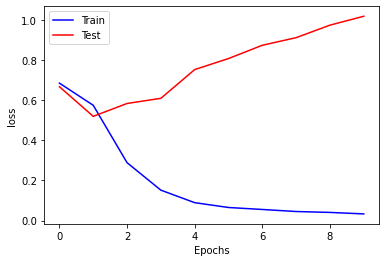

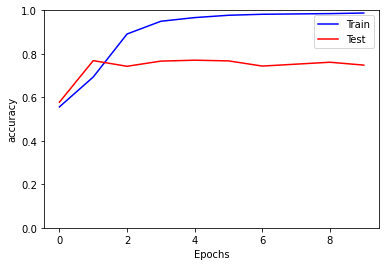

In [65]:
import matplotlib.pyplot as plt

# Visualization of the training process on the loss function 
plt.plot(history.history["loss"], color="b",label = "Train")
plt.plot(history.history["val_loss"], color="r",label = "Test")
plt.legend()
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

# Visualization of accuracy training 
plt.plot(history.history["binary_accuracy"], color="b",label = "Train")
plt.plot(history.history["val_binary_accuracy"], color="r",label = "Test")
plt.legend()
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.ylim([0, 1])

plt.show()

# 3. Conclusion

### After having processed, cleaned and filtered all our data on the tweets affected by the dataset, we come to that conclusion :

- The dataset contains a majority of events situated in USA, UK and India
- We have seen the top keywords on the tweets labaled as disaster
- Our model gives us an accuracy of around 80% which shows that these tweets are about a disaster.